# **V5 on Complete Datatest**

In [1]:
import sys
import os
current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

from utils.wrapper import YOLOAPIWrappper
from utils.pipeline import CPPipeline

### **Multiplicative**

In [ ]:
v5 = '../utils/v5/bestv5.onnx'
yolov5_detector = YOLOAPIWrappper(v5,file_path='calibv5_all_test_m.pickle', conf_thres=0.7, iou_thres=0.5)
pipev5 = CPPipeline(yolov5_detector, test_set='test', method='multiplicative')

In [3]:
X_train, y_train, labels_train= pipev5.extract_yolo_dataset()
X_train, X_val, y_train, y_val, labels_train, labels_val = pipev5.calibration_and_val(X_train, y_train, labels_train)

In [4]:
conformal_predictor = pipev5.pipeline( X_train=X_train, y_train= y_train, labels_train= labels_train)

Predictions: [[1228.91174316 1398.90490723 1279.6072998  1463.62805176]
 [1450.76477051 1058.54504395 1648.59069824 1133.0904541 ]
 [1531.36865234 1210.97680664 1714.45410156 1398.99755859]
 ...
 [ 873.53790283 1025.50756836  939.78924561 1064.9934082 ]
 [1465.98779297 1103.47973633 1593.33886719 1252.46435547]
 [1264.39648438 1105.86962891 1382.53173828 1196.93334961]]
Matched Ground Truths: [[1229. 1398. 1278. 1467.]
 [1443. 1056. 1638. 1132.]
 [1529. 1209. 1709. 1404.]
 ...
 [ 871. 1021.  942. 1069.]
 [1464. 1104. 1591. 1246.]
 [1271. 1106. 1379. 1198.]]
Images: ['/home/aws_install/data/yolo_database/images/test/OMAD_13_35_03.jpeg', '/home/aws_install/data/yolo_database/images/test/mg7v0EMfJ74_ZBAA47.png', '/home/aws_install/data/yolo_database/images/test/UbPJcYKDwpM_LSZH49.png', '/home/aws_install/data/yolo_database/images/test/LICJ_20_35_05.jpeg', '/home/aws_install/data/yolo_database/images/test/LICJ_25_35_11.jpeg', '/home/aws_install/data/yolo_database/images/test/SAEZ_17_35_22.

Marginal coverage: 1.0
Average area: 72666.140625


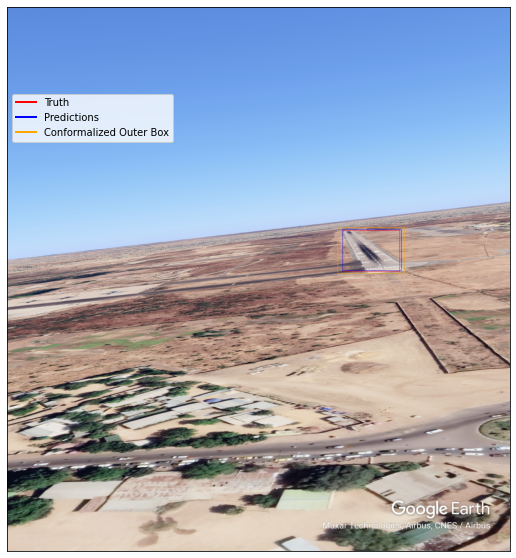

In [5]:
pipev5.infer_eval_single_image(
    conformal_predictor, 
    X_val[5],  # Image path at index 5
    y_val[5],  # Ground truth bounding boxes at index 5
    labels_val[5],  # Labels at index 5
    None  # `y_new_api` is set to None, so the function will compute it internally
)

Marginal coverage: 0.0
Average area: 2915.530029296875
Marginal coverage: 0.0
Average area: 8464.75
Marginal coverage: 1.0
Average area: 22087.919921875
Marginal coverage: 1.0
Average area: 11941.2998046875
Marginal coverage: 1.0
Average area: 5961.25
No detections in image /home/aws_install/data/yolo_database/images/test/EHAM_36L_35_04.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test/LFPO_CC-lSLLiueE_22.png
No detections in image /home/aws_install/data/yolo_database/images/test/LGSM_27_35_03.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test/DAAS_27_35_07.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test/LEMD_14L_35_04.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test/HTDA_5_35_04.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test/DAAS_9_35_06.jpeg
No detections in image /home/aws_install/data/yolo_database/images/test/OMAD_13_35_19.jpeg
No detections i

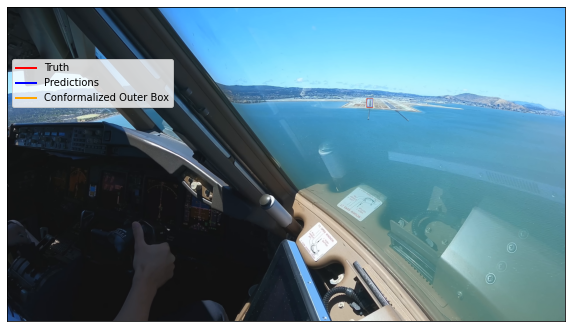

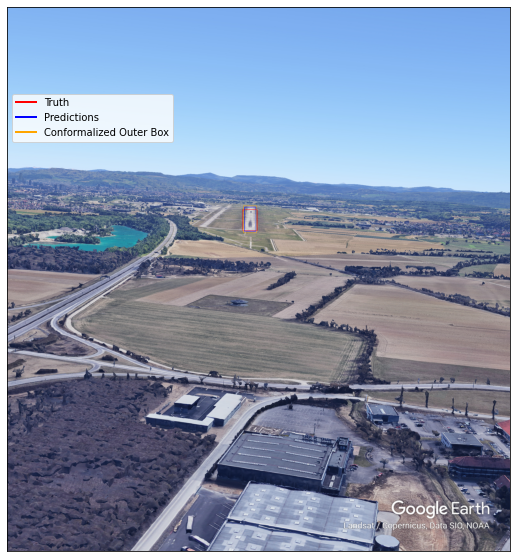

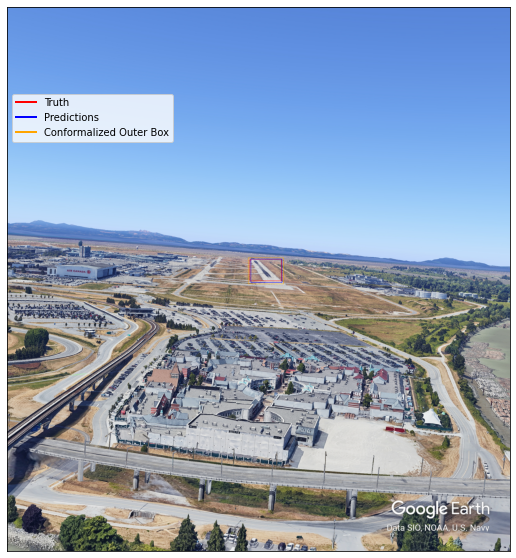

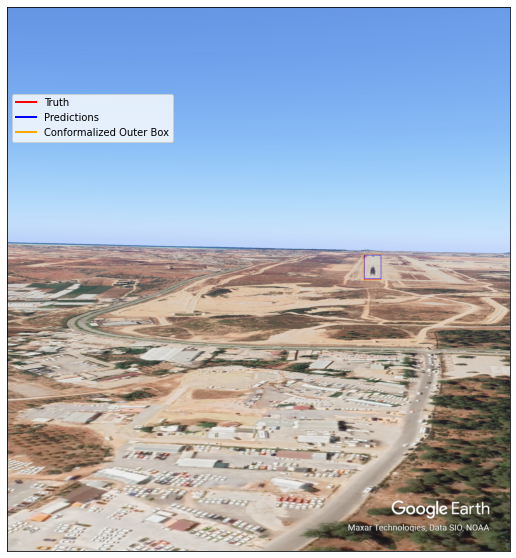

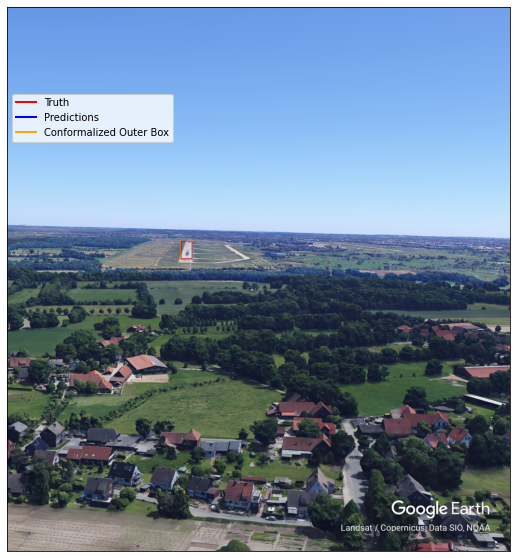

In [6]:
y_pred_val, y_true_val, box_outer_val, images_val = pipev5.infer_eval_all(X_val, y_val, labels_val, conformal_predictor, visualize = True)